In [1]:
#importing essential packges 
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
%matplotlib inline

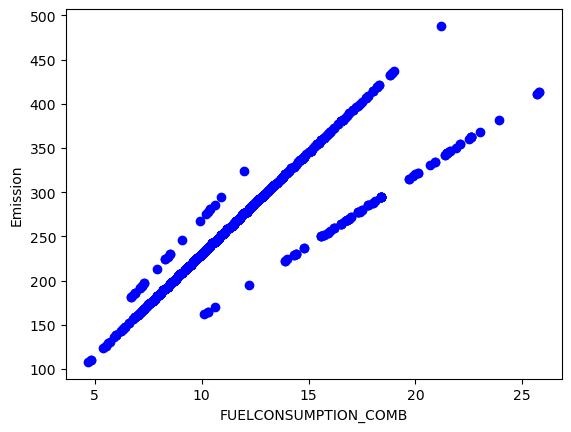

In [2]:
#loading data and ploting some feature to see the their relation against the dependent variable
cdf=pd.read_csv('FuelConsumptionCo2.csv')
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

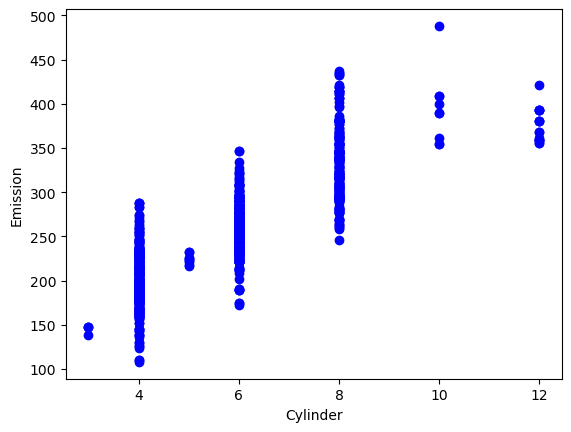

In [3]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

In [5]:
#spliting out data into training and testing data
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]


In [10]:
#traing our simple linear regression model
regressionModel=linear_model.LinearRegression()
linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regressionModel.fit(train_x,train_y)
# The coefficients
print ('Coefficients : ', regressionModel.coef_)
print ('Intercept: ',regressionModel.intercept_)

Coefficients :  [[38.4564766]]
Intercept:  [127.77735439]


Text(0, 0.5, 'Emission')

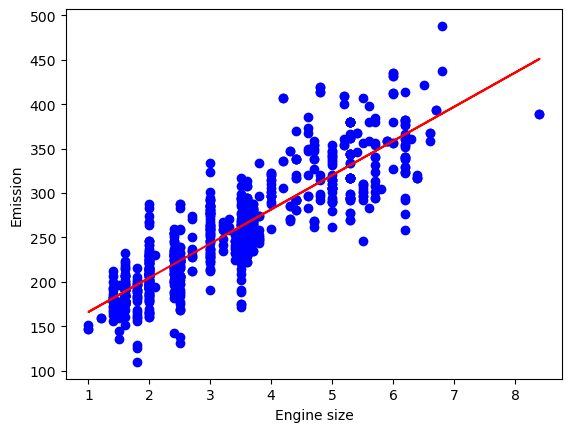

In [11]:
#ploting the result
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regressionModel.coef_[0][0]*train_x + regressionModel.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [12]:
#model evaluation
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_2 = regressionModel.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_2) )

Mean absolute error: 23.98
Residual sum of squares (MSE): 940.02
R2-score: 0.78
